In [2]:
import koreanize_matplotlib
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


데이터베이스에서 수집 및 정리된 데이터 가져오기

In [3]:
db = mysql.connector.Connect(
    host='database-1.cls80ok4wdvh.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='min',
    password='addinedu1234!',
    database='OliveYoung'
)

cur = db.cursor(buffered=True)

In [4]:
def base_to_df(table_name):
    # 테이블에서 데이터 가져오기
    cur.execute(f'SELECT * FROM {table_name}')
    result = cur.fetchall()
    # 컬럼 이름 가져오기
    cur.execute(f'DESC {table_name}')
    column_info = cur.fetchall()
    column_names = [col[0] for col in column_info]
    # DataFrame 생성 및 컬럼 이름 설정
    df = pd.DataFrame(result, columns=column_names)
    return df

In [5]:
essence_df = base_to_df('essence')
essence_df.head()

,브랜드명,제품명,원가,세일가,평점 갯수,평점,건성,복합성,지성,보습,진정,주름/미백,자극x,보통,자극O,성분
0,VT,VT 리들샷 100 에센스 50ml,32000,28800,8039,4.7,20,65,15,22,41,37,13,31,56,"정제수,다이프로필렌글라이콜,글리세린,나이아신아마이드,부틸렌글라이콜,마카다미아씨오일,..."
1,구달,구달 청귤 비타C 잡티케어 세럼 30ml 트리플기획,56000,30900,18746,4.8,30,61,9,27,28,45,59,39,3,"탄제린추출물,부틸렌글라이콜,나이아신아마이드,다이프로필렌글라이콜,메틸글루세스-20,정..."
2,토리든,토리든 다이브인 저분자 히알루론산 세럼 50ml 리필기획,36000,23750,26123,4.8,41,48,11,75,25,1,81,19,1,"정제수,부틸렌글라이콜,글리세린,다이프로필렌글라이콜,1,2-헥산다이올,판테놀,소듐하이..."
3,넘버즈인,넘버즈인 3번 보들보들 결 세럼 80ml 기획,34000,23800,18311,4.7,31,59,10,52,31,17,57,37,7,"비피다발효용해물,갈락토미세스발효여과물,부틸렌글라이콜,메틸글루세스-20,정제수,나이아..."
4,웰라쥬,웰라쥬 리얼 히알루로닉 블루 100 앰플 100ml+75ml 기획,53000,31900,4039,4.9,39,49,12,71,29,1,78,22,0,"'정제수,프로판다이올,펜틸렌글라이콜,글리세린,1,2-헥산다이올,판테놀,참마뿌리추출물..."


In [7]:
db.close()
essence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   브랜드명    533 non-null    object 
 1   제품명     533 non-null    object 
 2   원가      533 non-null    int64  
 3   세일가     533 non-null    int64  
 4   평점 갯수   533 non-null    int64  
 5   평점      533 non-null    float64
 6   건성      533 non-null    int64  
 7   복합성     533 non-null    int64  
 8   지성      533 non-null    int64  
 9   보습      533 non-null    int64  
 10  진정      533 non-null    int64  
 11  주름/미백   533 non-null    int64  
 12  자극x     533 non-null    int64  
 13  보통      533 non-null    int64  
 14  자극O     533 non-null    int64  
 15  성분      533 non-null    object 
dtypes: float64(1), int64(12), object(3)
memory usage: 66.8+ KB


In [10]:
essence_df = essence_df.rename(columns={'평점 갯수':'평점수', '건성':'건성%', '지성':'지성%',
                                        '복합성':'복합성%', '보습':'보습%', '진정':'진정%',
                                        '주름/미백':'주름/미백%', '자극x':'저자극%', '보통':'보통%',
                                        '자극O':'자극적%'})

In [11]:
essence_df.head()

,브랜드명,제품명,원가,세일가,평점수,평점,건성%,복합성%,지성%,보습%,진정%,주름/미백%,저자극%,보통%,자극적%,성분
0,VT,VT 리들샷 100 에센스 50ml,32000,28800,8039,4.7,20,65,15,22,41,37,13,31,56,"정제수,다이프로필렌글라이콜,글리세린,나이아신아마이드,부틸렌글라이콜,마카다미아씨오일,..."
1,구달,구달 청귤 비타C 잡티케어 세럼 30ml 트리플기획,56000,30900,18746,4.8,30,61,9,27,28,45,59,39,3,"탄제린추출물,부틸렌글라이콜,나이아신아마이드,다이프로필렌글라이콜,메틸글루세스-20,정..."
2,토리든,토리든 다이브인 저분자 히알루론산 세럼 50ml 리필기획,36000,23750,26123,4.8,41,48,11,75,25,1,81,19,1,"정제수,부틸렌글라이콜,글리세린,다이프로필렌글라이콜,1,2-헥산다이올,판테놀,소듐하이..."
3,넘버즈인,넘버즈인 3번 보들보들 결 세럼 80ml 기획,34000,23800,18311,4.7,31,59,10,52,31,17,57,37,7,"비피다발효용해물,갈락토미세스발효여과물,부틸렌글라이콜,메틸글루세스-20,정제수,나이아..."
4,웰라쥬,웰라쥬 리얼 히알루로닉 블루 100 앰플 100ml+75ml 기획,53000,31900,4039,4.9,39,49,12,71,29,1,78,22,0,"'정제수,프로판다이올,펜틸렌글라이콜,글리세린,1,2-헥산다이올,판테놀,참마뿌리추출물..."


데이터의 신뢰성을 높이기 위해 평점수와 평점을 설정함

In [12]:
essence_df_r = essence_df[essence_df['평점수']>=300]
essence_df_r = essence_df_r[essence_df_r['평점']>=4]
len(essence_df_r)   #533-> 257

257

평균보다 원가가 낮은 데이터를 추가적으로 생성함

In [13]:
essence_df_m = essence_df_r[essence_df_r['원가']<=36000]
len(essence_df_m)

156

브랜드 개수

/tmp/ipykernel_13747/1856878672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(essence_df_r['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)


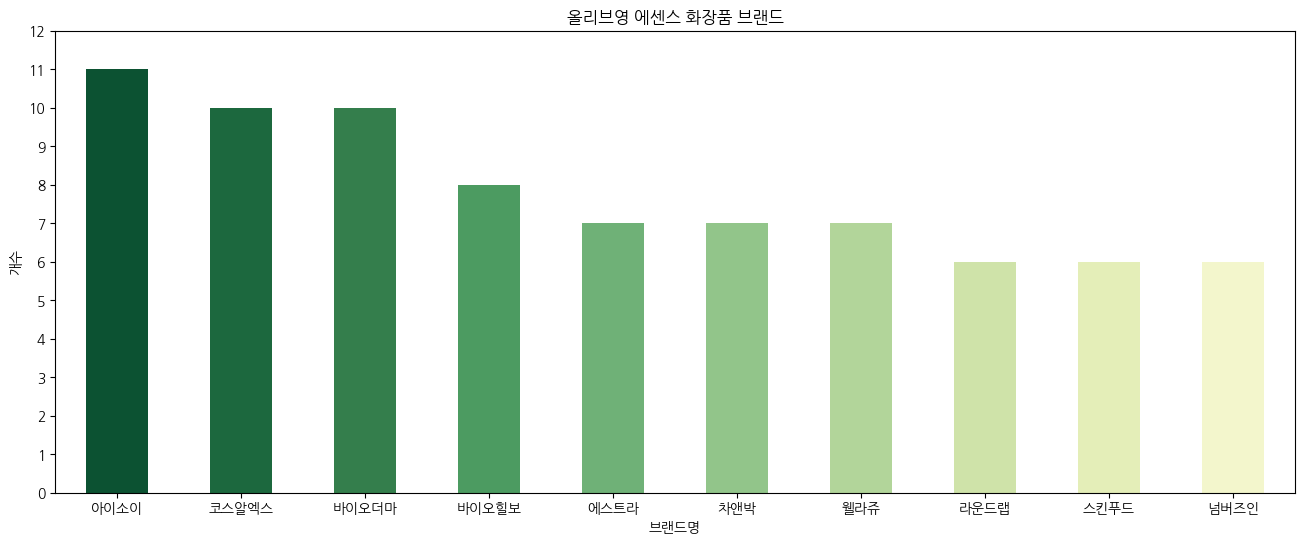

In [15]:
plt.figure(figsize=(16, 6))
sns.barplot(essence_df_r['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)
plt.title('올리브영 에센스 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 13, 1));

/tmp/ipykernel_13747/2810800784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(essence_df_m['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)


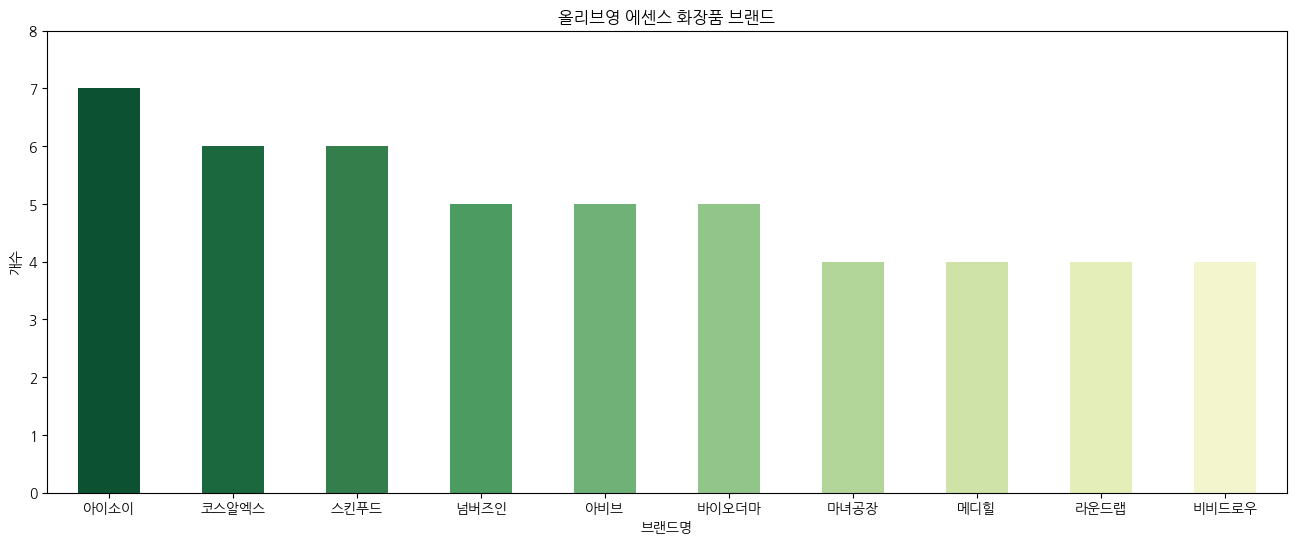

In [16]:
plt.figure(figsize=(16, 6))
sns.barplot(essence_df_m['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)
plt.title('올리브영 에센스 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 9, 1));

저자극

/tmp/ipykernel_13747/3091001783.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)


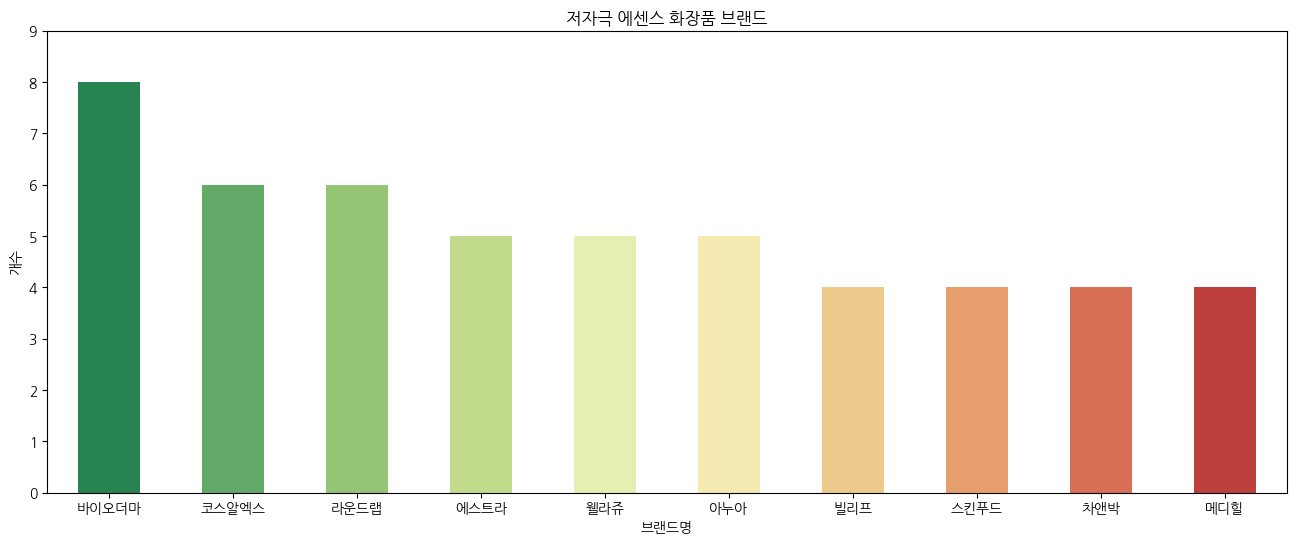

In [17]:
temp1 = essence_df_r[essence_df_r['저자극%']>=72].sort_values(by='저자극%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)
plt.title('저자극 에센스 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 10, 1));

/tmp/ipykernel_13747/3236191544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)


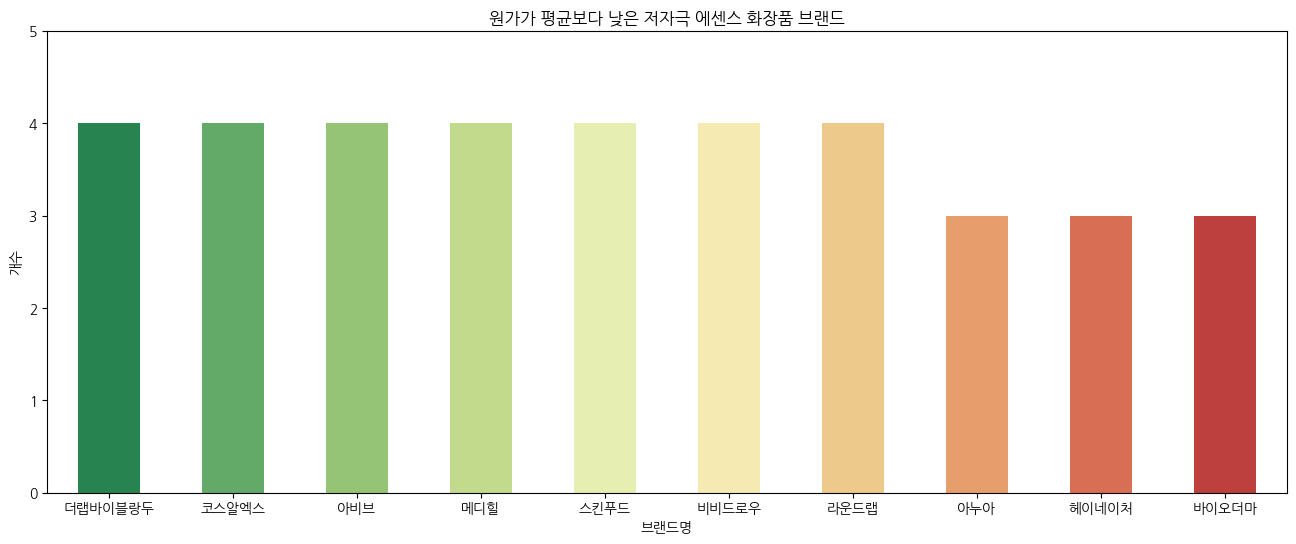

In [18]:
temp1 = essence_df_m[essence_df_m['저자극%']>=72].sort_values(by='저자극%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)
plt.title('원가가 평균보다 낮은 저자극 에센스 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 6, 1));

보습

/tmp/ipykernel_13747/3816541317.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)


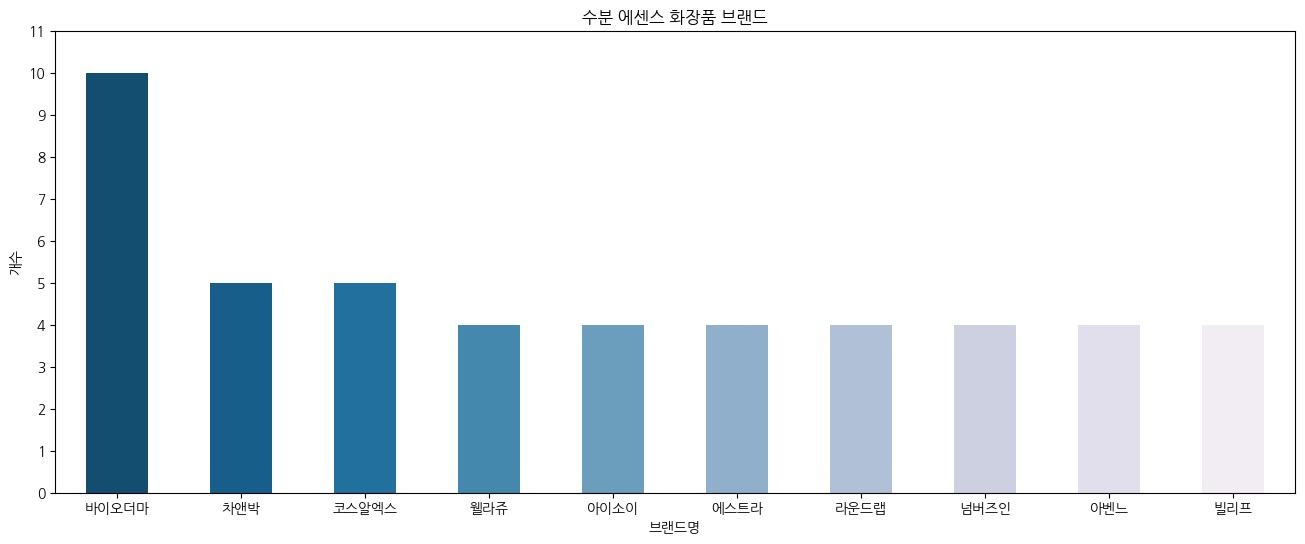

In [19]:
temp1 = essence_df_r[essence_df_r['보습%']>=45].sort_values(by='보습%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)
plt.title('수분 에센스 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 12, 1));

/tmp/ipykernel_13747/3300206498.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)


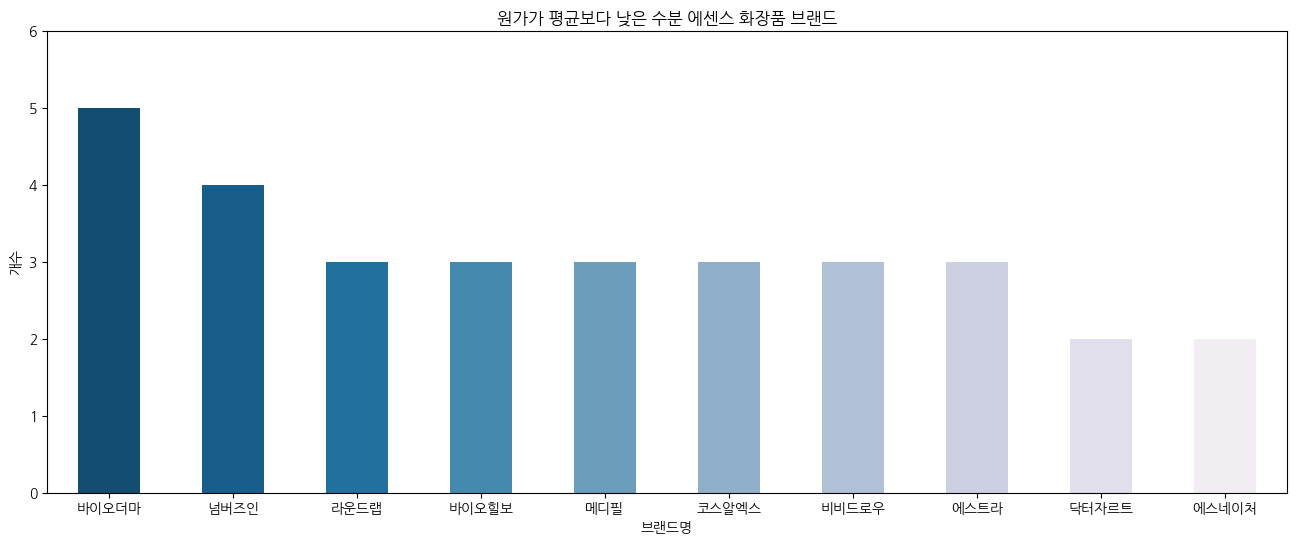

In [20]:
temp1 = essence_df_m[essence_df_m['보습%']>=45].sort_values(by='보습%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)
plt.title('원가가 평균보다 낮은 수분 에센스 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 7, 1));

진정

/tmp/ipykernel_13747/2014394841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)


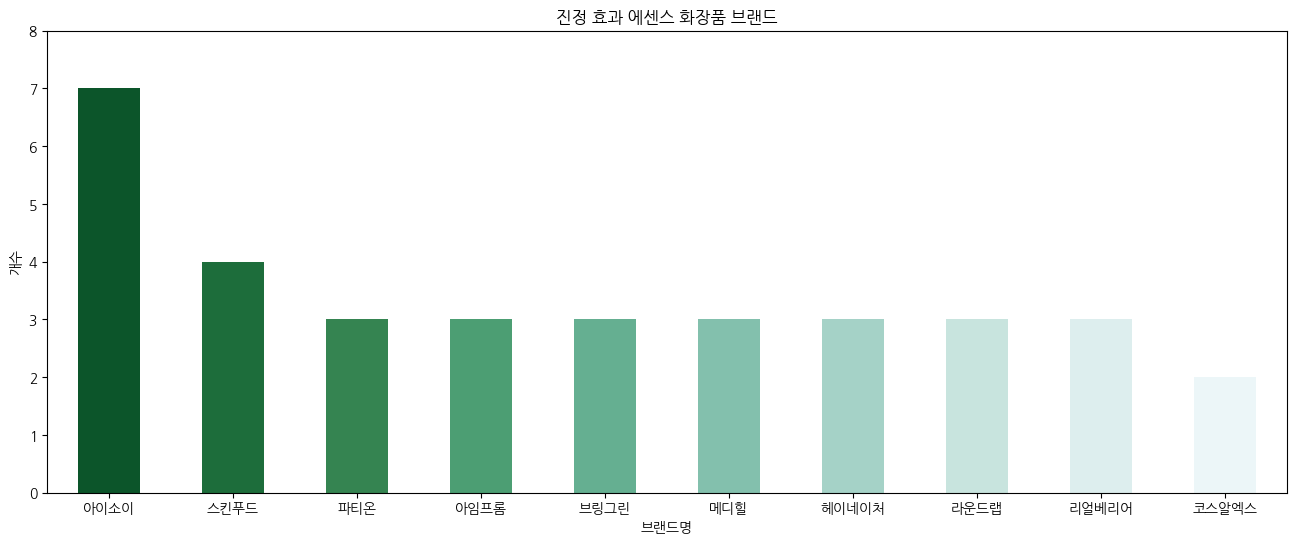

In [21]:
temp1 = essence_df_r[essence_df_r['진정%']>=38].sort_values(by='진정%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)
plt.title('진정 효과 에센스 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 9, 1));

/tmp/ipykernel_13747/3999475663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)


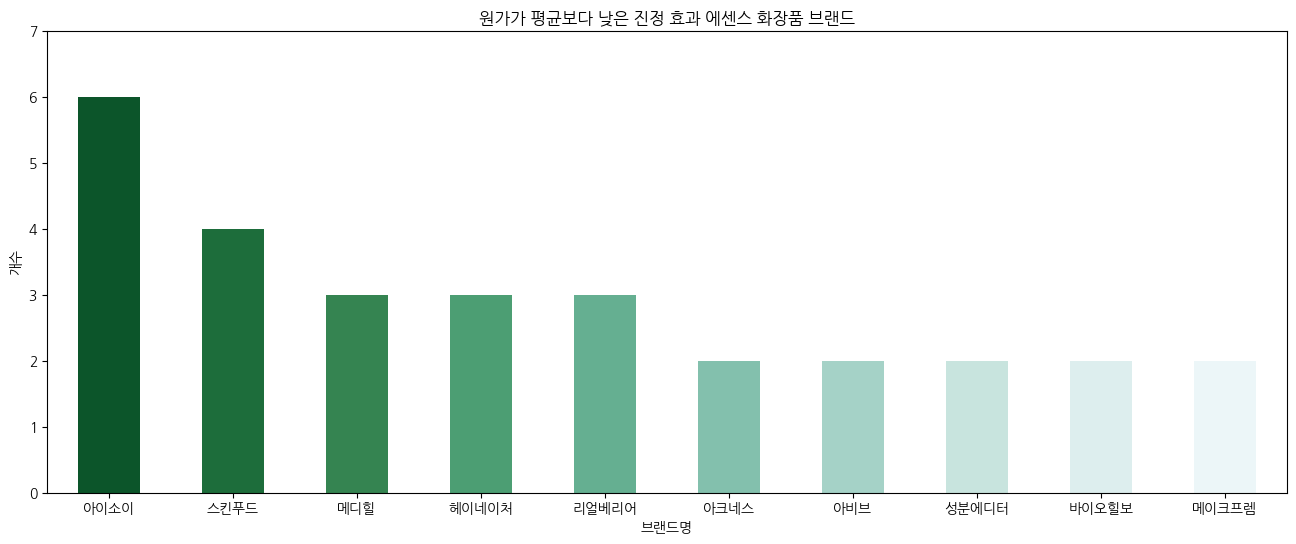

In [22]:
temp1 = essence_df_m[essence_df_m['진정%']>=38].sort_values(by='진정%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)
plt.title('원가가 평균보다 낮은 진정 효과 에센스 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 8, 1));

주름/미백

/tmp/ipykernel_13747/2014788131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)


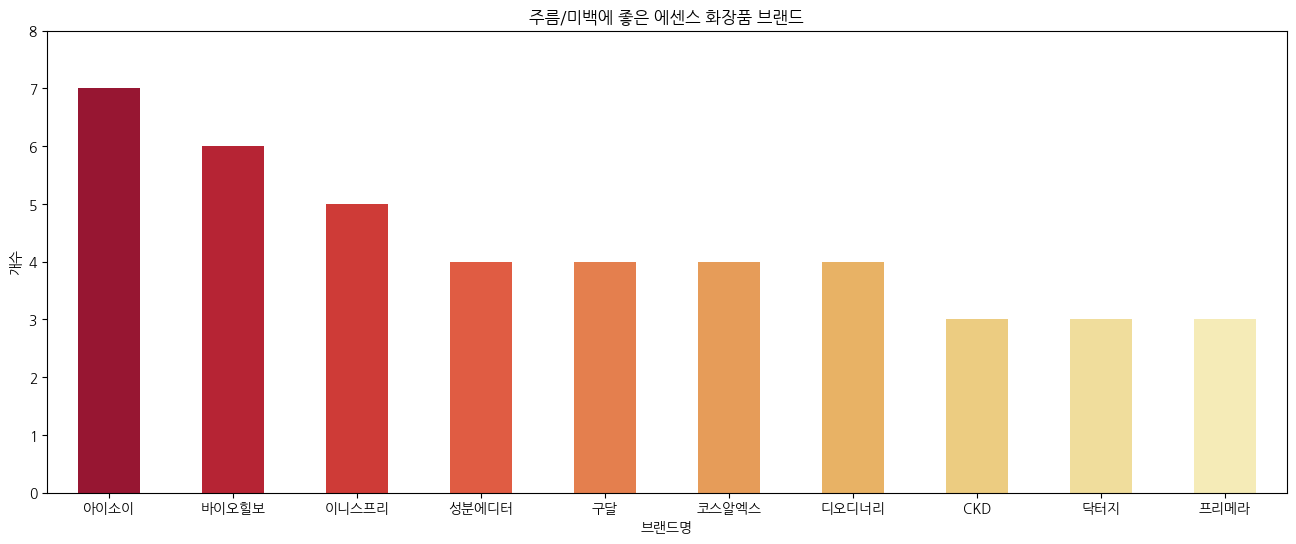

In [23]:
temp1 = essence_df_r[essence_df_r['주름/미백%']>19].sort_values(by='주름/미백%')

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)
plt.title('주름/미백에 좋은 에센스 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 9, 1));

/tmp/ipykernel_13747/466229052.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)


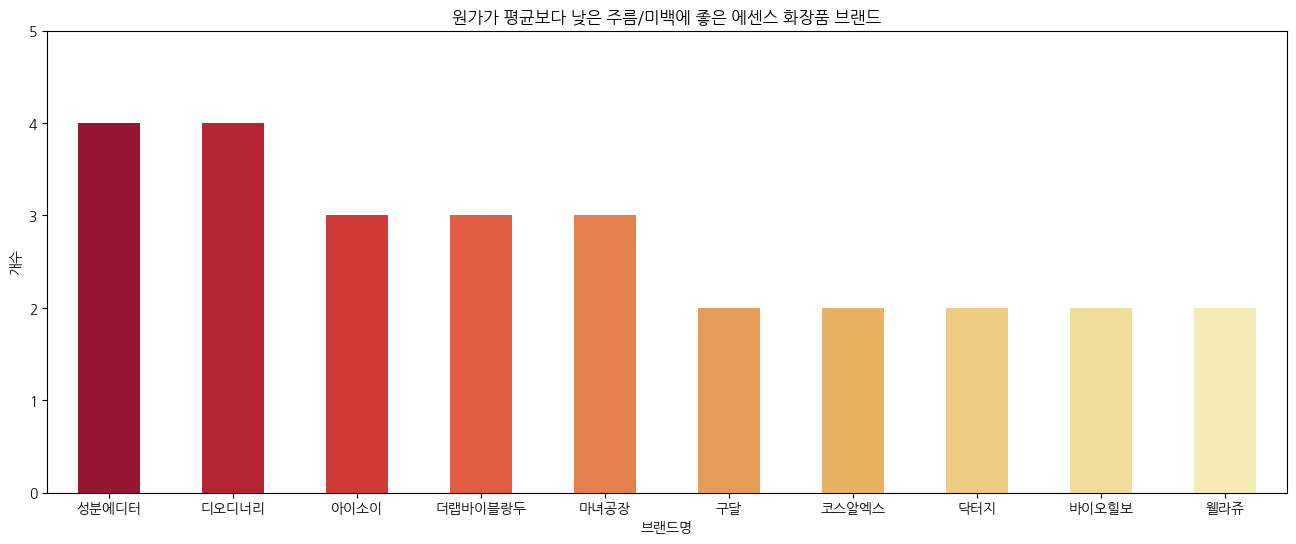

In [24]:
temp1 = essence_df_m[essence_df_m['주름/미백%']>18].sort_values(by='주름/미백%')

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)
plt.title('원가가 평균보다 낮은 주름/미백에 좋은 에센스 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 6, 1));